# Hazard:RiverFlood

A river flood hazard is generated by the class RiverFlood() that extracts flood data simulated within the Inter-Sectoral Impact Model Intercomparison Project (ISIMIP, https://www.isimip.org/). 
The method set_from_nc() generates a data set with flood depth in m and the flooded fraction in each centroid. The data derived from global hydrological models driven by various climate forcings. A link to the ISIMIP data repository will be provided soon. In this tutorial we show how flood depth and fractions can be transated into socio-economic impacts.

Besides, all other general Hazard Attributes, the class RiverFlood() has further Attributes related to the flooded area and flood volume:

- fla_ann_av      (float) average flooded area per year
- fla_ev_av       (float) average flooded area per event
- fla_event       (1d array(n_events)) total flooded area for every event
- fla_annual      (1d array (n_years)) total flooded area for every year

- fv_annual      (1d array (n_years)) total flood volume for every year (area*depth)

Only set if save_centr = True in set_flooded_area():
- fla_ev_centr    (2d array(n_events x n_centroids)) flooded area in every centroid for every event
- fla_ann_centr   (2d array(n_years x n_centroids)) flooded area in every centroid for every year

- fv_ann_centr   (2d array(n_years x n_centroids)) flooded area in every centroid for every year   

## Generating a RiverFlood Hazard

A river flood is generated with the method set_from_nc(). There are different options for choosing centroids.
You can set centroids for:
- countries
- regions
- global hazards
- with random coordinates
- with random shape files (under development)

Countries or regions can either be set with corresponding ISIMIPNatID centroids (ISINatIDGrid = True) or with Natural Earth Multipolygons (default).
It is obligatory to set paths for flood depth and flood fraction, here we present example files from floods for the year 2000.


### Setting floods for countries with Natural Earth Multipolygons:

In [22]:
import sys
sys.path.append('/home/insauer/Climada/climada_python')
import numpy as np
import matplotlib.pyplot as plt
from climada.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids
from climada.util.constants import HAZ_DEMO_FLDDPH, HAZ_DEMO_FLDFRC


years = [2000]
# generating RiverFlood hazard from netCDF file
# uses centroids from Natural Earth Multipolygon for Germany, Austria and Switzerland
rf = RiverFlood()
rf.set_from_nc(countries = ['DEU','AUT','CHE'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC)
rf.event_name 

2020-06-24 12:10:15,184 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/flddph_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2020-06-24 12:10:15,213 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/fldfrc_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc


['2000']

resolution:


0.04166666666666666

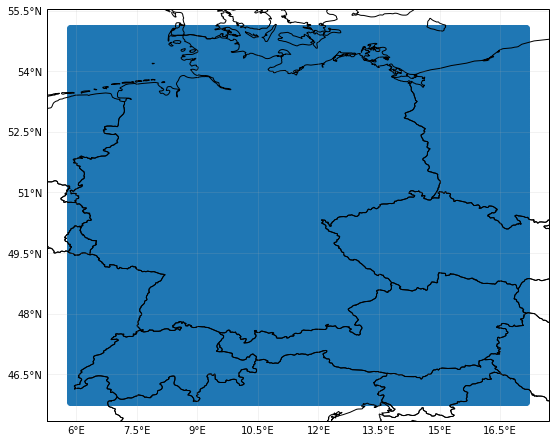

In [24]:
# Note: Points outside the selected countries are masked in further analysis.
# plot centroids:
rf.centroids.plot()
# get resolution
print('resolution:')
rf.centroids.meta['transform'][0]

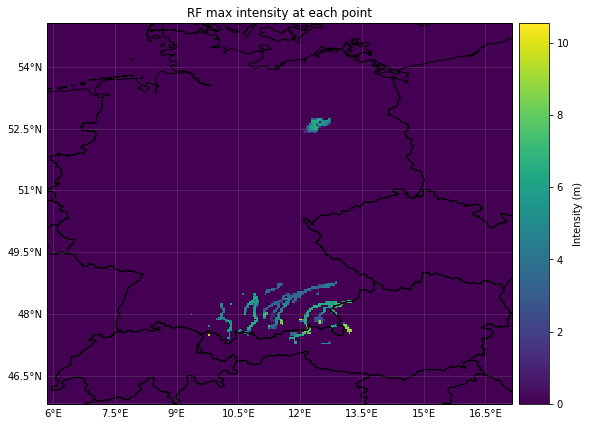

In [3]:
# plotting intensity (Flood depth in m)
rf.plot_intensity(event=0, smooth = False)

### Setting flood with ISIMIP Grid:

2020-06-24 12:13:44,079 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/flddph_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2020-06-24 12:13:44,544 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/fldfrc_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc


/home/insauer/Climada/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


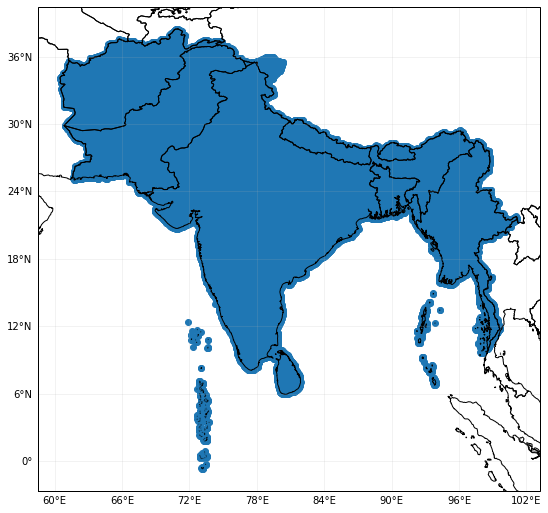

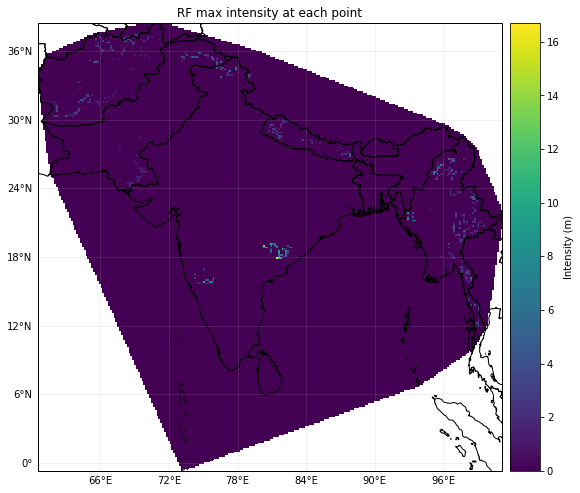

In [25]:
# generating RiverFlood hazard from netCDF file, using the ISIMIP NatIDGrid (according to ISIMIP standards) with a resolution of 150as (aprox 5km)
# setting centroids for a region
rf_SSA = RiverFlood()
rf_SSA.set_from_nc(reg = ['SWA'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC, ISINatIDGrid=True)
rf_SSA.centroids.plot()
rf_SSA.plot_intensity(event=0, smooth = False)

### Setting flood with random points as coordinates:

2019-09-13 10:12:22,712 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/fldfrc_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2019-09-13 10:12:23,370 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/flddph_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc


/home/insauer/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


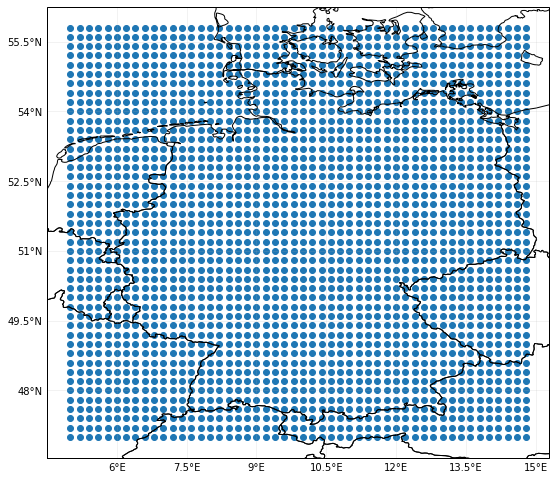

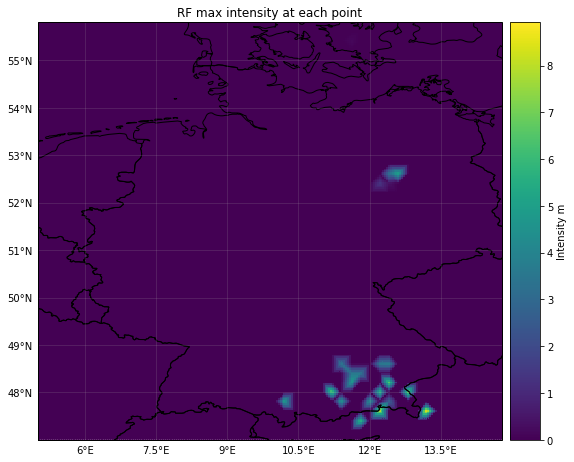

In [5]:
rand_centroids = Centroids()
lat = np.arange(47, 56, 0.2)
lon = np.arange(5, 15, 0.2)
lon, lat = np.meshgrid(lon, lat)
rand_centroids.set_lat_lon(lat.flatten(), lon.flatten())
rf_rand = RiverFlood()
rf_rand.set_from_nc(dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC,
                    centroids=rand_centroids, ISINatIDGrid=False)
rf_rand.centroids.plot()
rf_rand.plot_intensity(event = 0)


2020-06-24 12:14:55,218 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/fldfrc_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2020-06-24 12:14:55,866 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/flddph_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc


/home/insauer/Climada/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


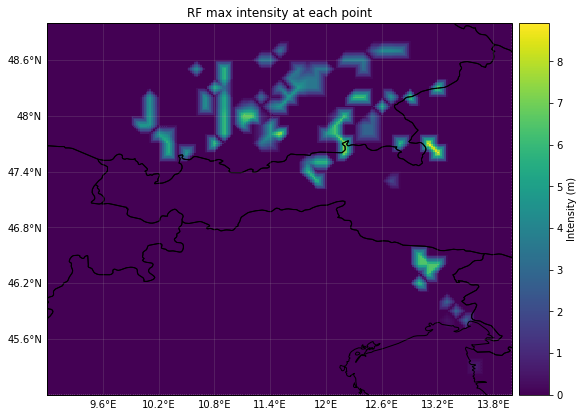

In [26]:
# setting random poits using raster
min_lat, max_lat, min_lon, max_lon = 45. , 49., 9., 14.
cent = Centroids()
cent.set_raster_from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.1)
rf_rast = RiverFlood()
rf_rast.set_from_nc(dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC,
                    centroids=cent, ISINatIDGrid=False)
rf_rast.plot_intensity(event=0)

## Calculating Flooded Area
The fraction indicates the flooded part of a grid cell. It is possible to calculate the flooded area for each grid cell and for the whole area under consideration 

As ISIMIP simulations currently provide yearly data with the maximum event, event and yearly flooded area are the same.

2020-06-24 15:46:07,847 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/flddph_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2020-06-24 15:46:07,890 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/fldfrc_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc


/home/insauer/Climada/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2020-06-24 15:46:08,205 - climada.hazard.centroids.centr - INFO - Setting geometry points.
Total flooded area for year 2000 in Germany:
2437074832.0380197 m2
Total flooded area at first event in Germany:
2437074832.0380197 m2


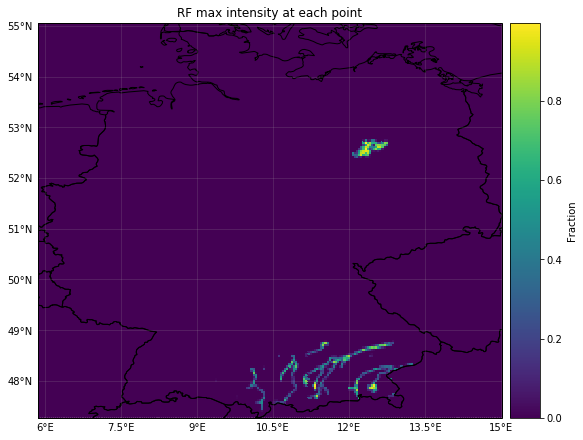

In [54]:
#setting river flood
rf_DEU = RiverFlood()
rf_DEU.set_from_nc(countries = ['DEU'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC)
rf_DEU.plot_fraction(event=0, smooth = False)
# calculating flooded area
rf_DEU.set_flooded_area()
print("Total flooded area for year " + str(years[0]) + " in Germany:")
print(str(rf_DEU.fla_annual[0]) + " m2")

print("Total flooded area at first event in Germany:")
print(str(rf_DEU.fla_event[0]) + " m2")


In [8]:
#calculate flooded area
rf_DEU.set_flooded_area(save_centr = True)
print("affected area in each affected centroid and each event:")
rf_DEU.fla_ev_centr.data

2019-09-13 10:12:42,648 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2019-09-13 10:12:42,649 - climada.hazard.centroids.centr - DEBUG - Setting area_pixel 41548 points.
affected area in each affected centroid and each event:


array([  584715.81718072,  5053615.42987189,   584715.81718072,
         772660.21477247,  4635961.19139216,  4844788.31063191,
         877073.72577108,    62648.1284788 ,   793542.93642074,
         710012.09844898,   104512.31458989,  7942935.27615562,
       12980428.99755675,  8862643.59587924, 11015597.79960522,
        8151960.31900815,  8026545.7605029 ,  8110155.46617279,
        3428003.77254628,  2550100.30565756,  5748176.99827292,
       10743865.08816197, 10116791.51695982,   167219.69117698,
         167377.62651458,  2426975.61490712,  7866748.5314332 ,
       12448711.57332617, 10691246.31833798,  3807841.25590698,
         795043.75943462,  9958969.25866094, 10858623.66475107,
       10586635.08712338,  9938046.70065339,  9414992.10340605,
        4100752.0018361 ,    20922.20331432,  4020851.5658597 ,
        8628077.07461064, 12271973.68427272, 11036399.71240725,
        6135986.84213667,  5863741.76936025,  5319251.23373324,
        7936993.24829797, 12104437.71477

# Generating ISIMIP Exposure
The exposed assets are calculated by means of national GDP converted to total national wealth as a proxy for asset distribution, downscaled by means of data from population distribution. 

In [28]:
# set exposure for damage calculation
from climada.entity.exposures.gdp_asset import GDP2Asset
from climada.util.constants import DEMO_GDP2ASSET
gdpa = GDP2Asset()
gdpa.set_countries(countries = ['CHE'], ref_year = 2000, path=DEMO_GDP2ASSET)
gdpa

,value,latitude,longitude,if_RF,region_id
0,3.556720e+09,45.853916,8.937364,3.0,11.0
1,2.400900e+09,45.853916,8.979031,3.0,11.0
2,2.250146e+08,45.853916,9.020698,3.0,11.0
3,2.939545e+08,45.895583,7.104034,3.0,11.0
4,3.476220e+08,45.895583,7.145701,3.0,11.0
5,1.224757e+08,45.895583,7.187367,3.0,11.0
6,2.287360e+07,45.895583,7.229034,3.0,11.0
7,3.556720e+09,45.895583,8.937364,3.0,11.0
8,2.400900e+09,45.895583,8.979031,3.0,11.0
9,2.250146e+08,45.895583,9.020698,3.0,11.0


/home/insauer/Climada/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


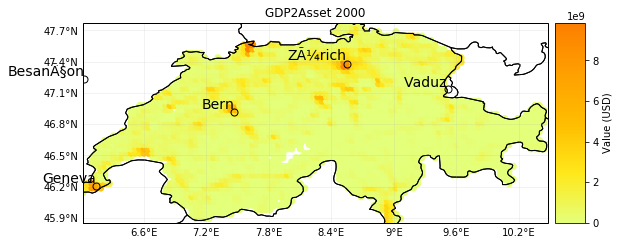

In [29]:
from matplotlib import colors
norm=colors.LogNorm(vmin=1.0e2, vmax=1.0e10)
gdpa.plot_scatter()

## Setting JRC damage functions

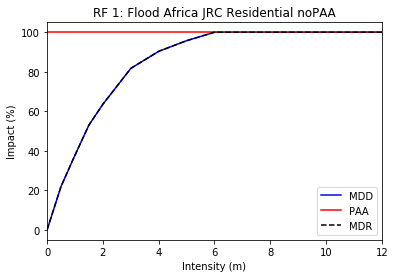

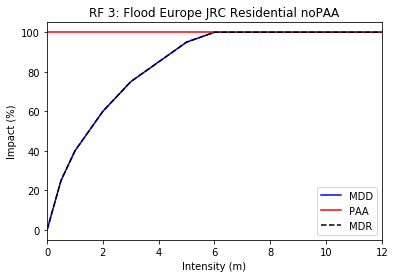

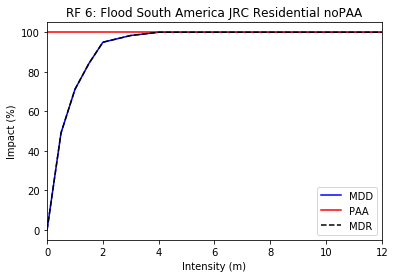

In [31]:
# import impact function set for RiverFlood using JRC damage functions () for 6 regions
from climada.entity.impact_funcs.river_flood import IFRiverFlood,flood_imp_func_set
if_set = flood_imp_func_set()
if_AFR = if_set.get_func(fun_id=1)
if_AFR[0].plot()
if_EUR = if_set.get_func(fun_id=3)
if_EUR[0].plot()
if_OCE = if_set.get_func(fun_id=6)
if_OCE[0].plot()

## Deriving flood impact

2020-06-24 13:11:29,593 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/flddph_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2020-06-24 13:11:29,610 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/fldfrc_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2020-06-24 13:11:32,428 - climada.entity.exposures.base - INFO - Matching 2760 exposures with 5390 centroids.
2020-06-24 13:11:32,430 - climada.engine.impact - INFO - Calculating damage for 2577 assets (>0) and 1 events.


/home/insauer/Climada/climada_python/climada/util/plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
/home/insauer/anaconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:704: UserWarning: Attempting to set identical left == right == 8.020699199999967 results in singular transformations; automatically expanding.
  self.set_xlim([x1, x2])
/home/insauer/anaconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:705: UserWarning: Attempting to set identical bottom == top == 47.478913399999996 results in singular transformations; automatically expanding.
  self.set_ylim([y1, y2])


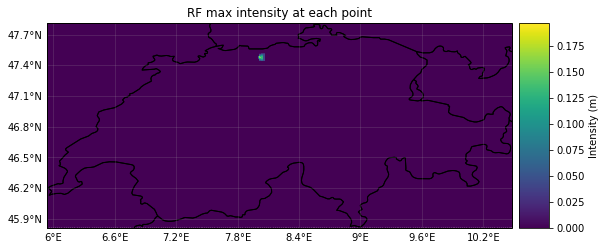

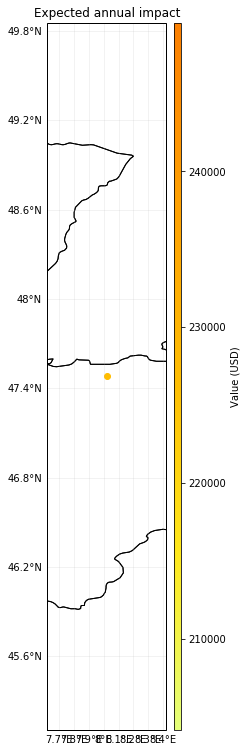

In [51]:
from climada.engine import Impact

rf_CHE = RiverFlood()
rf_CHE.set_from_nc(dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC,
                           countries = ['CHE'])        
gdpa = GDP2Asset()
gdpa.set_countries(countries=['CHE'], ref_year=2000, path = DEMO_GDP2ASSET)
if_set = flood_imp_func_set()
imp=Impact()
imp.calc(gdpa, if_set,rf_CHE,save_mat=True)
rf_CHE.plot_intensity(0)
imp.plot_scatter_eai_exposure()